In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [47]:
df = pd.read_csv('MagicBricks.csv')
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [49]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [50]:
df.shape

(1259, 11)

In [51]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [52]:
# Replacing missing values in Per_sqft
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])

In [53]:
# Replacing missing values in Parking, Bathroom, Furnishing and Type
df['Parking'].fillna(df['Parking'].mode()[0],inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0],inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0],inplace=True)
df['Type'].fillna(df['Type'].mode()[0],inplace=True)

In [54]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [55]:
# Checking datatype of each columns
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [56]:
# Parking and Number of bathrooms, can't be in float so, converting them into integer.
# Typecasting
df[['Parking','Bathroom']].astype('int64')

,Parking,Bathroom
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
1254,3,5
1255,3,2
1256,3,3
1257,1,2


In [57]:
# Unique value count
df.nunique()

Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       433
dtype: int64

In [58]:
# Value count for each value
print(df['Area'].value_counts(),'\n', df['BHK'].value_counts(),'\n', df['Bathroom'].value_counts(),'\n', df['Furnishing'].value_counts(),
'\n', df['Locality'].value_counts(),'\n', df['Parking'].value_counts(),'\n', df['Price'].value_counts(),'\n', df['Status'].value_counts(),
'\n', df['Transaction'].value_counts(),'\n', df['Type'].value_counts(),'\n', df['Per_Sqft'].value_counts())

Area
900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
150.0       1
3250.0      1
4000.0      1
5500.0      1
11050.0     1
Name: count, Length: 315, dtype: int64 
 BHK
3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: count, dtype: int64 
 Bathroom
2.0    553
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: count, dtype: int64 
 Furnishing
Semi-Furnished    713
Unfurnished       363
Furnished         183
Name: count, dtype: int64 
 Locality
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [59]:
# Adding new area column in Sq Yards for better understanding of area
df['Area_Yards'] = df['Area']/9

In [60]:
# Grouping the House Locality
# Unique localities
df['Locality'].unique

<bound method Series.unique of 0                                        Rohini Sector 25
1                  J R Designers Floors, Rohini Sector 24
2                     Citizen Apartment, Rohini Sector 13
3                                        Rohini Sector 24
4       Rohini Sector 24 carpet area 650 sqft status R...
                              ...                        
1254                                    Chittaranjan Park
1255                                    Chittaranjan Park
1256                                    Chittaranjan Park
1257                            Chittaranjan Park Block A
1258                                    Chittaranjan Park
Name: Locality, Length: 1259, dtype: object>

In [61]:
def grp_local(locality):
    locality = locality.lower() # to avoid case sensitive
    if 'rohini' in locality:
        return 'Rohini sector'
    elif 'chittaranjan' in locality:
        return 'Chittaranjan Park'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'budh' in locality:
        return 'Budh Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else: 
        return 'Other'
        
df['Locality'] = df['Locality'].apply(grp_local)

In [62]:
df['Locality'].value_counts()

Locality
Other                730
Lajpat Nagar          90
Dwarka Sector         87
Rohini sector         75
Shahdara              75
Alaknanda             58
Vasant Kunj           35
Kalkaji               32
Punjabi Bagh          31
Chittaranjan Park     28
Budh Vihar            18
Name: count, dtype: int64

In [63]:
# Using Z - Score to remove outliers
from scipy import stats
# Z score
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
# Removing outliers
df = df[(z < 3).all(axis=1)]

In [64]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Area_Yards
count,1189.000000,1189.000000,1189.000000,1189.000000,1.189000e+03,1189.000000,1189.000000
mean,1296.421567,2.735913,2.483600,1.410429,1.852459e+07,12629.785274,144.046841
std,750.284776,0.859232,0.952107,0.719913,1.772598e+07,8434.085021,83.364975
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1250.000000,3.111111
25%,800.000000,2.000000,2.000000,1.000000,5.510000e+06,6526.000000,88.888889
50%,1150.000000,3.000000,2.000000,1.000000,1.350000e+07,10943.000000,127.777778
75%,1600.000000,3.000000,3.000000,2.000000,2.490000e+07,16584.000000,177.777778
max,5220.000000,5.000000,5.000000,10.000000,9.300000e+07,72000.000000,580.000000


In [65]:
df.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,800.0,3,2.0,Semi-Furnished,Rohini sector,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0,88.888889
1,750.0,2,2.0,Semi-Furnished,Rohini sector,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0,83.333333
2,950.0,2,2.0,Furnished,Rohini sector,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0,105.555556
3,600.0,2,2.0,Semi-Furnished,Rohini sector,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0,66.666667
4,650.0,2,2.0,Semi-Furnished,Rohini sector,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0,72.222222
5,1300.0,4,3.0,Semi-Furnished,Rohini sector,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0,144.444444
6,1350.0,4,3.0,Semi-Furnished,Rohini sector,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0,150.000000
7,650.0,2,2.0,Semi-Furnished,Rohini sector,1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0,72.222222
8,985.0,3,3.0,Unfurnished,Rohini sector,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0,109.444444
9,1300.0,4,4.0,Semi-Furnished,Rohini sector,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0,144.444444


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Area in Yards')

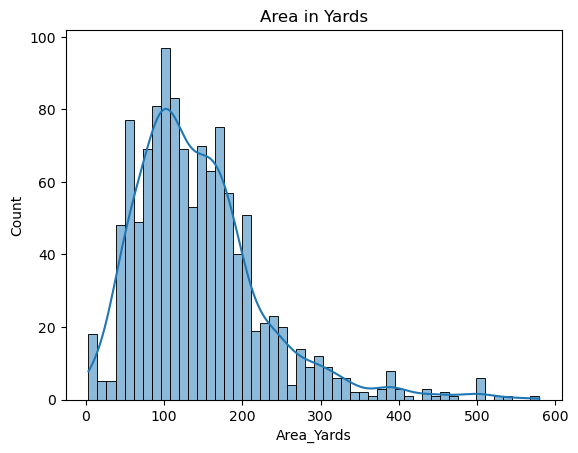

In [66]:
# Area of Houses
sns.histplot(x = df['Area_Yards'], kde = True, bins = 50).set_title('Area in Yards')

## BHK

Text(0.5, 1.0, 'BHK')

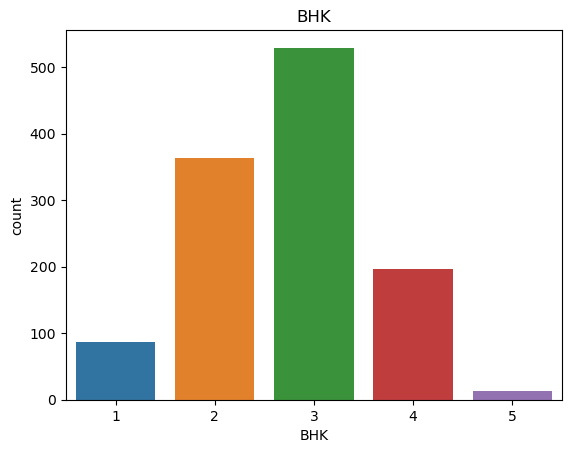

In [67]:
sns.countplot(x = 'BHK', data = df).set_title('BHK')

## Bathroom Count

Text(0.5, 1.0, 'Bathroom')

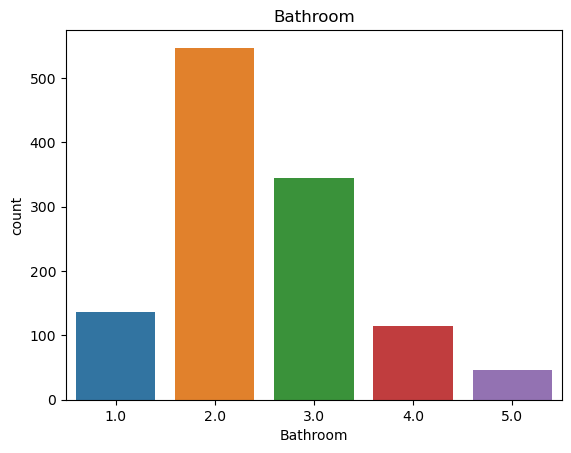

In [68]:
sns.countplot(x = 'Bathroom', data = df).set_title('Bathroom')

### Furnishing

Text(0.5, 1.0, 'Furnishing')

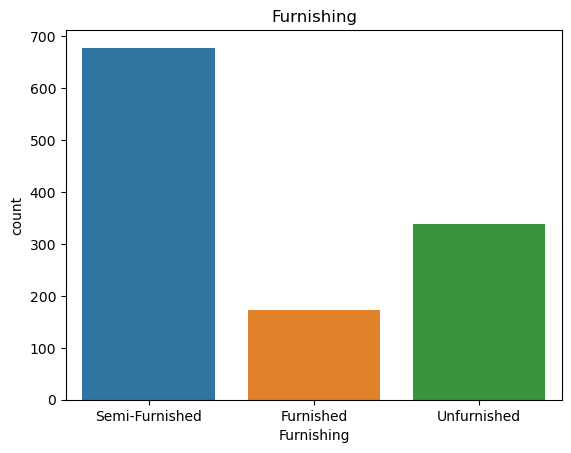

In [69]:
sns.countplot(x = 'Furnishing', data = df).set_title('Furnishing')

### Locality

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Budh Vihar'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Vasant Kunj'),
  Text(6, 0, 'Shahdara'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Punjabi Bagh'),
  Text(9, 0, 'Kalkaji'),
  Text(10, 0, 'Chittaranjan Park')])

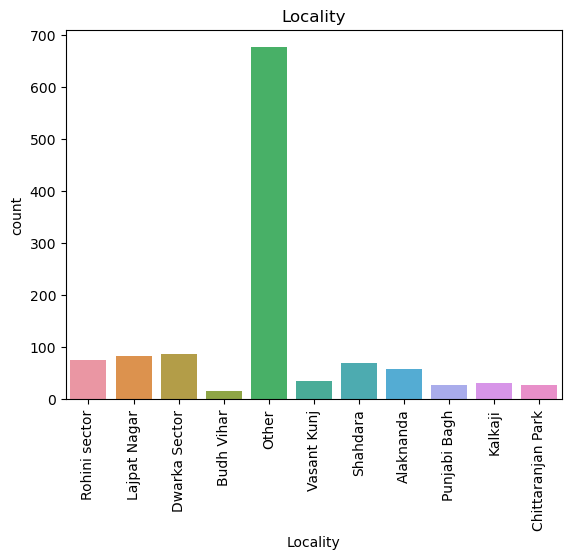

In [70]:
sns.countplot(x = 'Locality', data = df).set_title('Locality')
plt.xticks(rotation = 90)

### Parking

Text(0.5, 1.0, 'Parking')

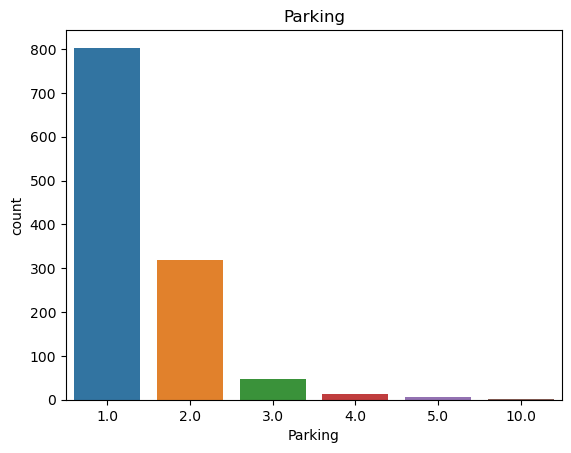

In [71]:
sns.countplot(x = 'Parking', data = df).set_title('Parking')

### Status

Text(0.5, 1.0, 'Status of the Property')

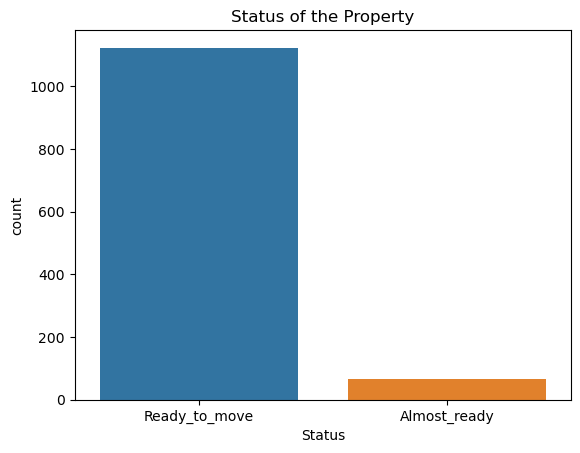

In [72]:
sns.countplot(x = 'Status', data = df).set_title('Status of the Property')

## Transaction Type

Text(0.5, 1.0, 'Transaction Type')

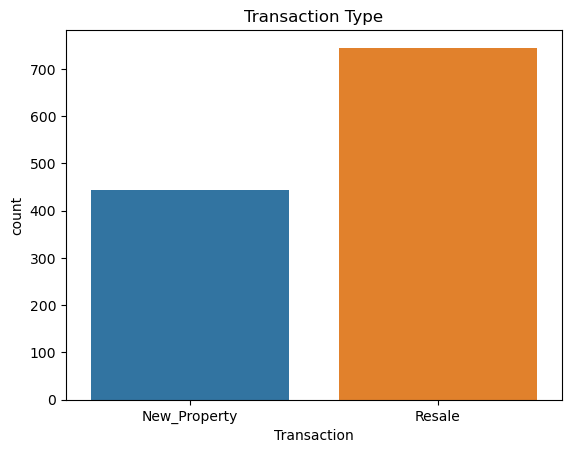

In [73]:
sns.countplot(x = 'Transaction', data = df).set_title('Transaction Type')

## House Type

Text(0.5, 1.0, 'Type of House')

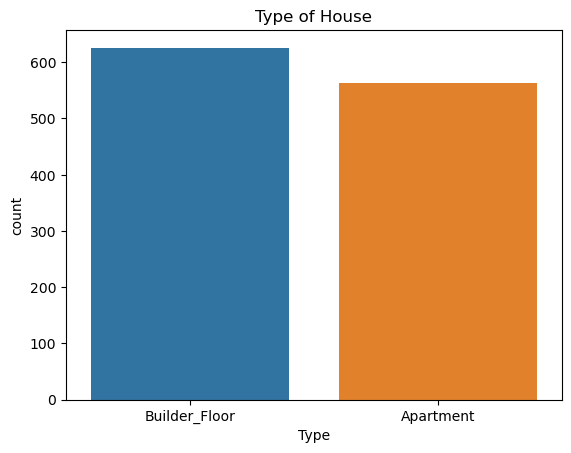

In [74]:
sns.countplot(x = 'Type', data = df).set_title('Type of House')

## Area & Price

<Axes: xlabel='Area_Yards', ylabel='Price'>

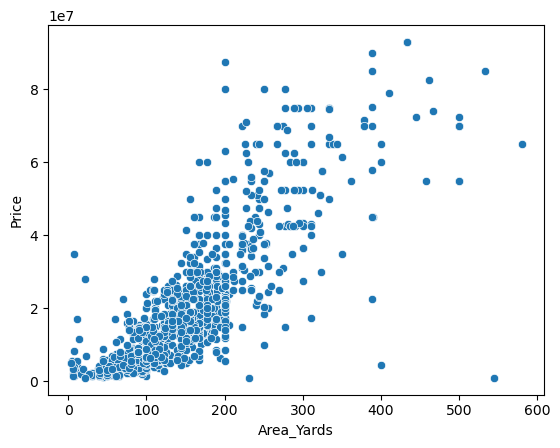

In [75]:
sns.scatterplot(x = 'Area_Yards', y = 'Price', data = df)

## BHK & Price

Text(0.5, 1.0, 'BHK vs Price')

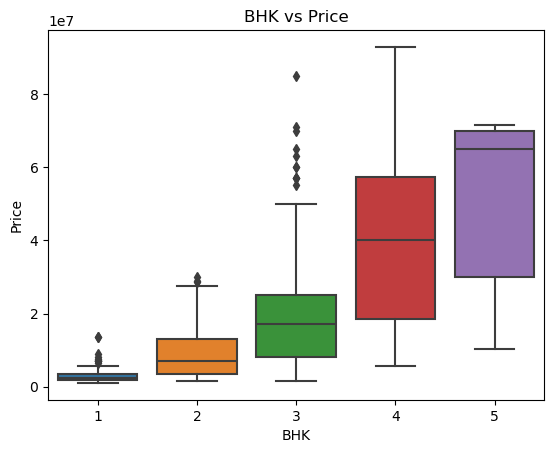

In [76]:
sns.boxplot(x = 'BHK', y = 'Price', data = df).set_title('BHK vs Price')

## Bathroom count & Price

Text(0.5, 1.0, 'Bathroom vs Price')

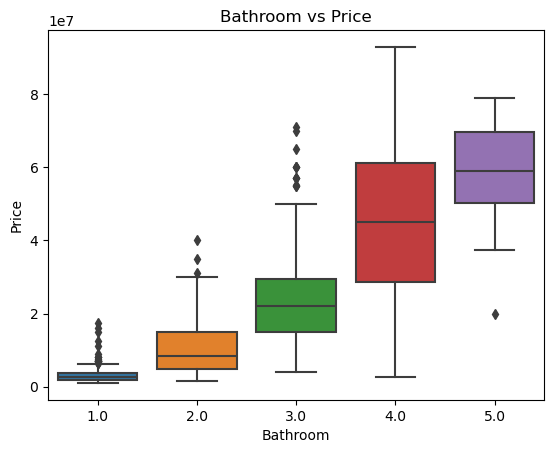

In [77]:
sns.boxplot(x = 'Bathroom', y = 'Price', data = df).set_title('Bathroom vs Price')

## Parking & Price

Text(0.5, 1.0, 'Parking vs Price')

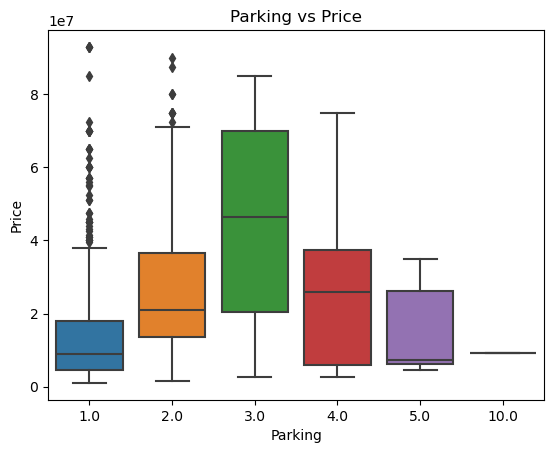

In [78]:
sns.boxplot(x = 'Parking', y = 'Price', data = df).set_title('Parking vs Price')

## Locality & Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Budh Vihar'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Vasant Kunj'),
  Text(6, 0, 'Shahdara'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Punjabi Bagh'),
  Text(9, 0, 'Kalkaji'),
  Text(10, 0, 'Chittaranjan Park')])

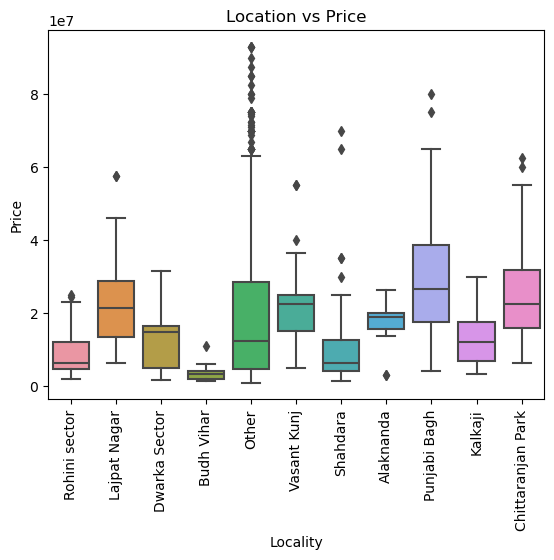

In [79]:
sns.boxplot(x = 'Locality', y = 'Price', data = df).set_title('Location vs Price')
plt.xticks(rotation=90)

## Furnishing & Price

Text(0.5, 1.0, 'Furnishing vs Price')

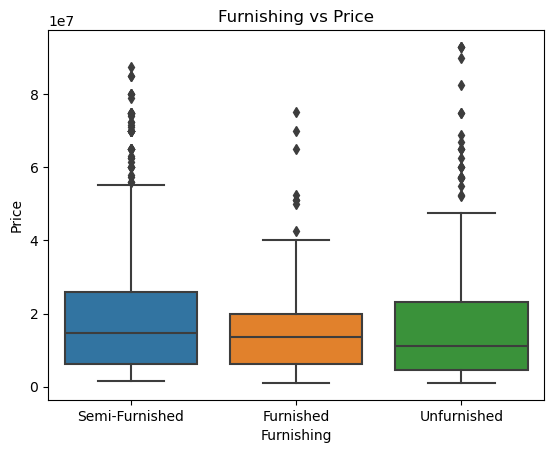

In [80]:
sns.boxplot(x = 'Furnishing', y = 'Price', data = df).set_title('Furnishing vs Price')

## Status & Price

Text(0.5, 1.0, 'Status vs Price')

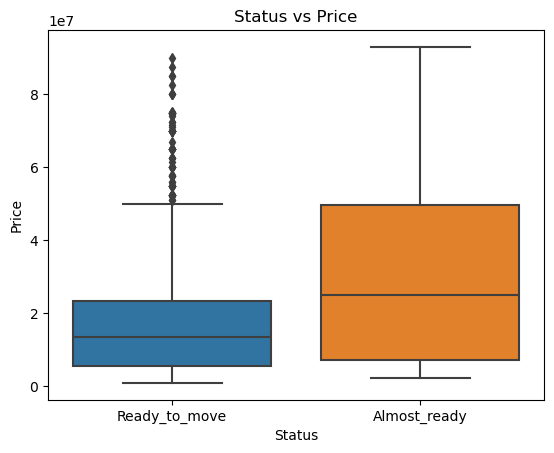

In [81]:
sns.boxplot(x = 'Status', y = 'Price', data = df).set_title('Status vs Price')

## Transaction Type & Price

Text(0.5, 1.0, 'Transaction vs Price')

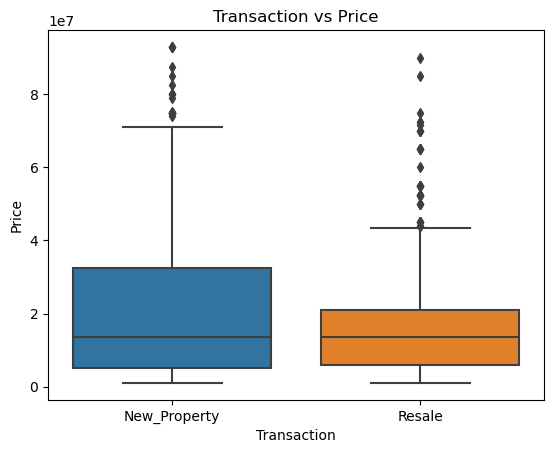

In [82]:
sns.boxplot(x = 'Transaction', y = 'Price', data = df).set_title('Transaction vs Price')

## Property Type & Price

Text(0.5, 1.0, 'Type vs Price')

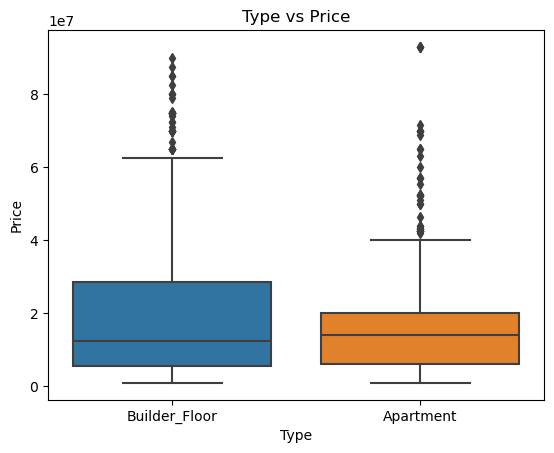

In [83]:
sns.boxplot(x = 'Type', y = 'Price', data = df).set_title('Type vs Price')

# Data Preprocessing 2

### Label encoding the categorical variables 

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# columns for label encoding
cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']

for i in cols:
    le.fit(df[i])
    df[i] =le.transform(df[i])
    print(i, df[i].unique())

Furnishing [1 0 2]
Locality [ 8  5  3  1  6 10  9  0  7  4  2]
Status [1 0]
Transaction [0 1]
Type [1 0]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17772\2967284287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] =le.transform(df[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17772\2967284287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] =le.transform(df[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17772\2967284287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [90]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler
df[['Area','Price','Per_Sqft','Area_Yards']] = MinMaxScaler().fit_transform(cols,x)

NameError: name 'x' is not defined

### Co-relation Matrix Heatmap

<Axes: >

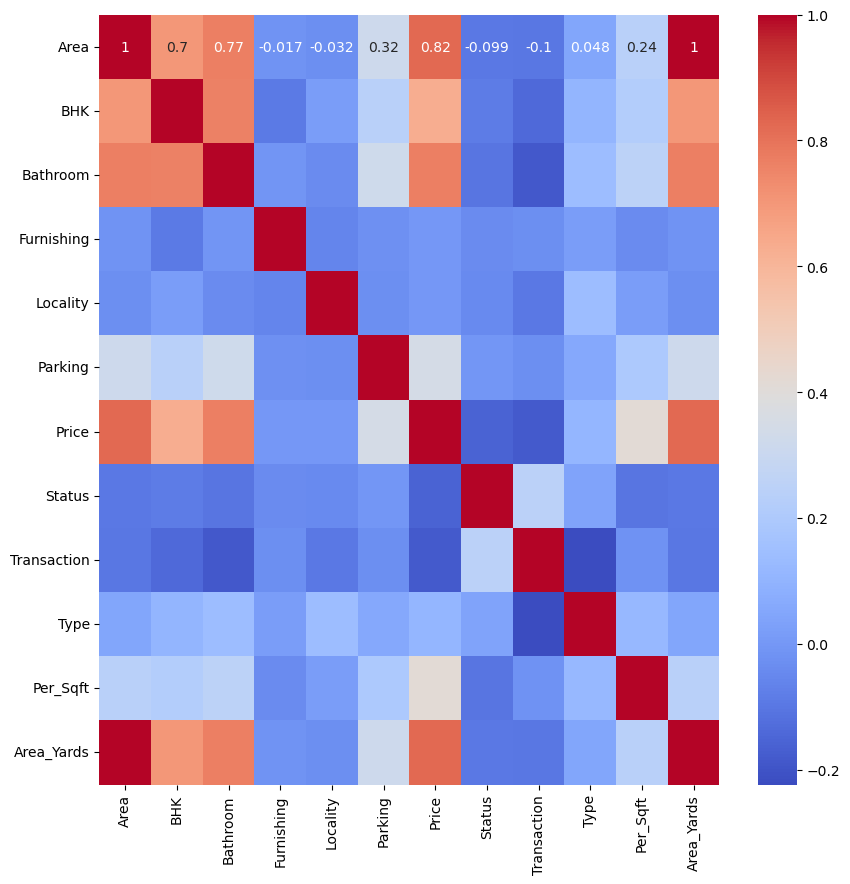

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')